In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
qwe = pd.read_csv('data.csv')
qwe = qwe.drop('Unnamed: 0', axis=1)
qwe.head()

,r1x,r1y,v1x,v1y,r2x,r2y,v2x,v2y,r3x,r3y,v3x,v3y
0,-1.202160,2.956511,-0.000610,9.763980e-08,-2.957054,3.290337,0.000119,-0.000302,-4.327533,-0.228538,0.000123,0.000269
1,-1.202222,2.956511,-0.001263,-4.254604e-05,-2.957042,3.290307,0.000283,-0.000566,-4.327521,-0.228511,0.000284,0.000572
2,-1.202348,2.956506,-0.001916,-8.519422e-05,-2.957014,3.290250,0.000446,-0.000830,-4.327493,-0.228454,0.000445,0.000875
3,-1.202539,2.956498,-0.002569,-1.278478e-04,-2.956969,3.290167,0.000609,-0.001094,-4.327448,-0.228366,0.000605,0.001178
4,-1.202796,2.956485,-0.003222,-1.705076e-04,-2.956908,3.290058,0.000773,-0.001358,-4.327388,-0.228248,0.000766,0.001481


In [3]:
data_1 = qwe.iloc[:, :4]
data_2 = qwe.iloc[:, 4:8]
data_3 = qwe.iloc[:, 8:]

In [4]:
data_1['v1x'] = data_1['v1x'] / 10
data_1['v1y'] = data_1['v1y'] / 10
data_2['v2x'] = data_2['v2x'] / 10
data_2['v2y'] = data_2['v2y'] / 10
data_3['v3x'] = data_3['v3x'] / 10
data_3['v3y'] = data_3['v3y'] / 10

C:\Users\thien\AppData\Local\Temp\ipykernel_10264\3853416216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['v1x'] = data_1['v1x'] / 10
C:\Users\thien\AppData\Local\Temp\ipykernel_10264\3853416216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['v1y'] = data_1['v1y'] / 10
C:\Users\thien\AppData\Local\Temp\ipykernel_10264\3853416216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [5]:
data_1['speed'] = data_1['v1x'] ** 2 + data_1['v1y'] ** 2 
data_2['speed'] = data_2['v2x'] ** 2 + data_2['v2y'] ** 2 
data_3['speed'] = data_3['v3x'] ** 2 + data_3['v3y'] ** 2 
data_1['speed'] = data_1['speed'] ** (1/2)
data_2['speed'] = data_2['speed'] ** (1/2)
data_3['speed'] = data_3['speed'] ** (1/2)

C:\Users\thien\AppData\Local\Temp\ipykernel_10264\1943379682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['speed'] = data_1['v1x'] ** 2 + data_1['v1y'] ** 2
C:\Users\thien\AppData\Local\Temp\ipykernel_10264\1943379682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['speed'] = data_2['v2x'] ** 2 + data_2['v2y'] ** 2
C:\Users\thien\AppData\Local\Temp\ipykernel_10264\1943379682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [6]:
data_1['speed']

0      0.000061
1      0.000126
2      0.000192
3      0.000257
4      0.000323
         ...   
995    0.013394
996    0.013501
997    0.013606
998    0.013709
999    0.013809
Name: speed, Length: 1000, dtype: float64

In [7]:
import ipywidgets
def plotwg(time=0):
    plt.figure(figsize=(10,6))
    x1 = data_1.iloc[:time, 0]; x1_dot = data_1.iloc[time, 0]
    y1 = data_1.iloc[:time, 1]; y1_dot = data_1.iloc[time, 1]
    x2 = data_2.iloc[:time, 0]; x2_dot = data_2.iloc[time, 0]
    y2 = data_2.iloc[:time, 1]; y2_dot = data_2.iloc[time, 1]
    x3 = data_3.iloc[:time, 0]; x3_dot = data_3.iloc[time, 0]
    y3 = data_3.iloc[:time, 1]; y3_dot = data_3.iloc[time, 1]
    plt.plot(x1, y1, linestyle = '--', color='r', label='path dot1')
    plt.scatter(x1_dot, y1_dot, color='r', label='current position dot1')
    plt.plot(x2, y2, linestyle = '--', color='g', label='path dot2')
    plt.scatter(x2_dot, y2_dot, color='g', label='current position dot2')
    plt.plot(x3, y3, linestyle = '--', color='b', label='path dot3')
    plt.scatter(x3_dot, y3_dot, color='b', label='current position dot3')
    plt.legend(['path dot1', 'current position dot1', 'path dot2', 'current position dot2', 'path dot3', 'current position dot3'])

### Слайдер

In [8]:
ipywidgets.interact(plotwg, time=(0, 999, 1))

interactive(children=(IntSlider(value=0, description='time', max=999), Output()), _dom_classes=('widget-intera…

<function __main__.plotwg(time=0)>

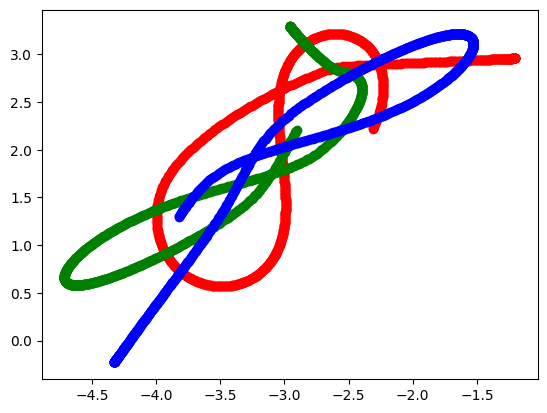

In [9]:
plt.scatter(data_1['r1x'], data_1['r1y'], color='r')
plt.scatter(data_2['r2x'], data_2['r2y'], color='g')
plt.scatter(data_3['r3x'], data_3['r3y'], color='b')

### Гістограми абсолютного значення швидкостей

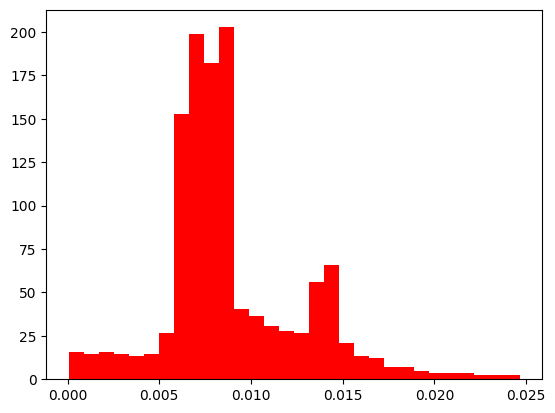

In [10]:
_ = plt.hist(data_1['speed'], density= True, color='r', bins=30)

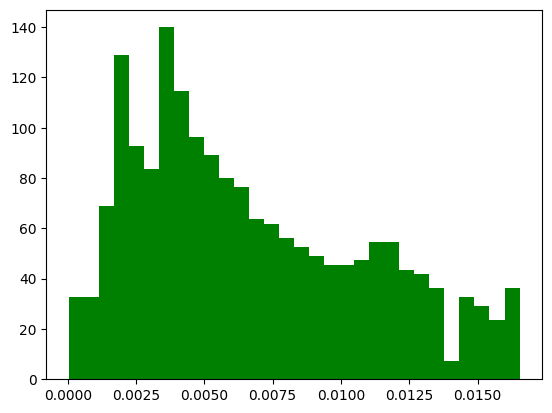

In [11]:
_ = plt.hist(data_2['speed'], density=True, color='g', bins=30)

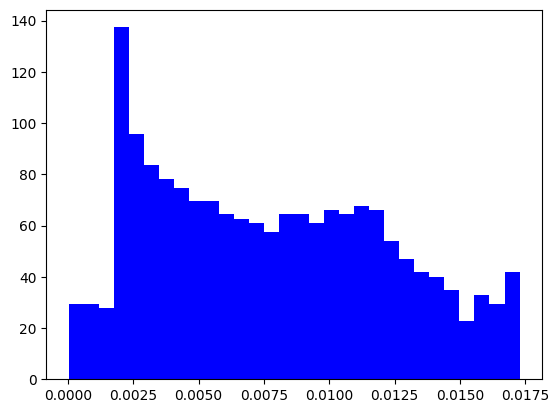

In [12]:
_ = plt.hist(data_3['speed'], density=True, color='b', bins=30)

### 2d гістограми розподілу прискорень по x та y

c:\Users\thien\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


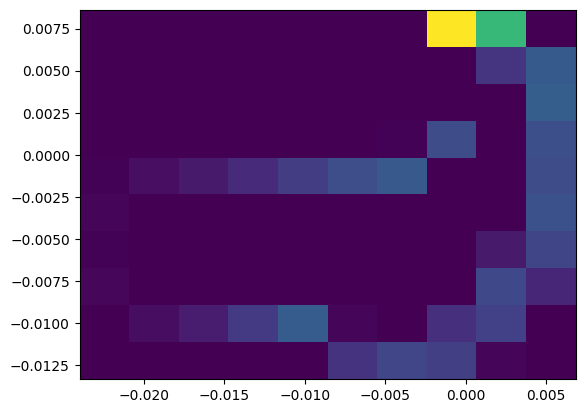

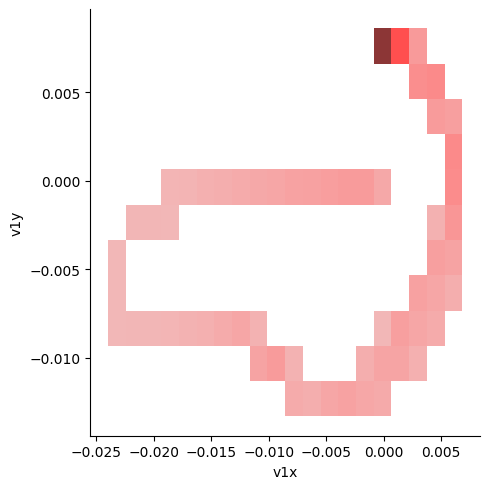

In [13]:
plt.hist2d(data_1['v1x'], data_1['v1y'])
sns.displot(data_1, x='v1x', y='v1y', color='r')
plt.show()

c:\Users\thien\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


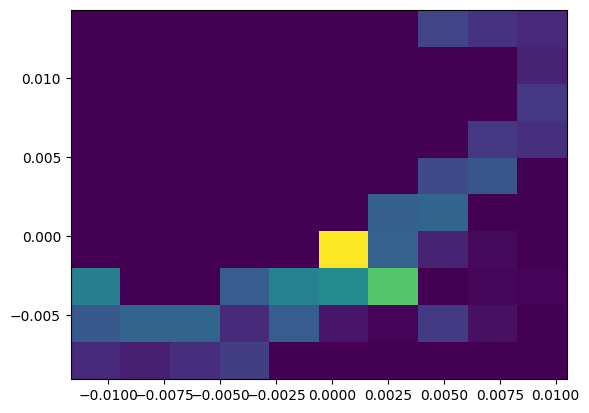

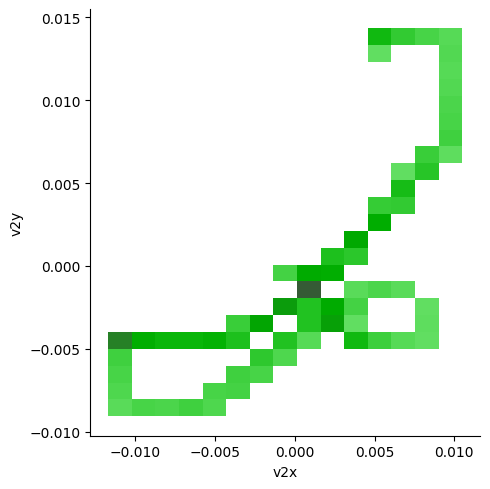

In [14]:
plt.hist2d(data_2['v2x'], data_2['v2y'])
sns.displot(data_2, x='v2x', y='v2y', color='g')
plt.show()

c:\Users\thien\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


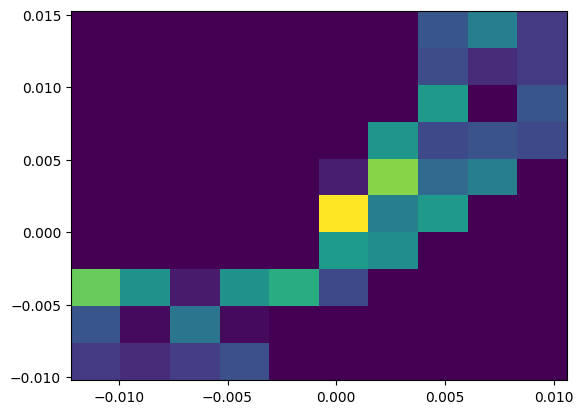

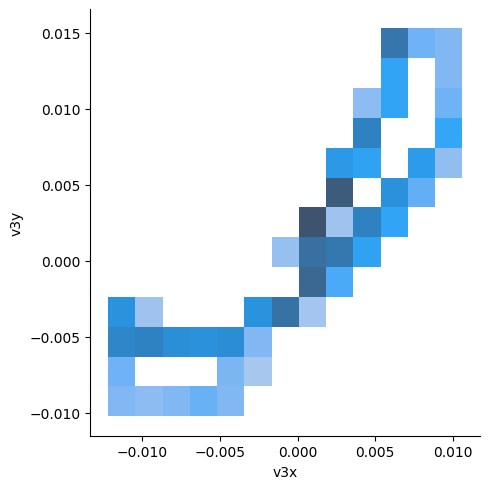

In [15]:
plt.hist2d(data_3['v3x'], data_3['v3y'])
sns.displot(data_3, x='v3x', y='v3y')
plt.show()

# Оцінка мас

In [16]:
data = pd.read_csv('data.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,r1x,r1y,v1x,v1y,r2x,r2y,v2x,v2y,r3x,r3y,v3x,v3y
0,-1.202160,2.956511,-0.000610,9.763980e-08,-2.957054,3.290337,0.000119,-0.000302,-4.327533,-0.228538,0.000123,0.000269
1,-1.202222,2.956511,-0.001263,-4.254604e-05,-2.957042,3.290307,0.000283,-0.000566,-4.327521,-0.228511,0.000284,0.000572
2,-1.202348,2.956506,-0.001916,-8.519422e-05,-2.957014,3.290250,0.000446,-0.000830,-4.327493,-0.228454,0.000445,0.000875
3,-1.202539,2.956498,-0.002569,-1.278478e-04,-2.956969,3.290167,0.000609,-0.001094,-4.327448,-0.228366,0.000605,0.001178
4,-1.202796,2.956485,-0.003222,-1.705076e-04,-2.956908,3.290058,0.000773,-0.001358,-4.327388,-0.228248,0.000766,0.001481


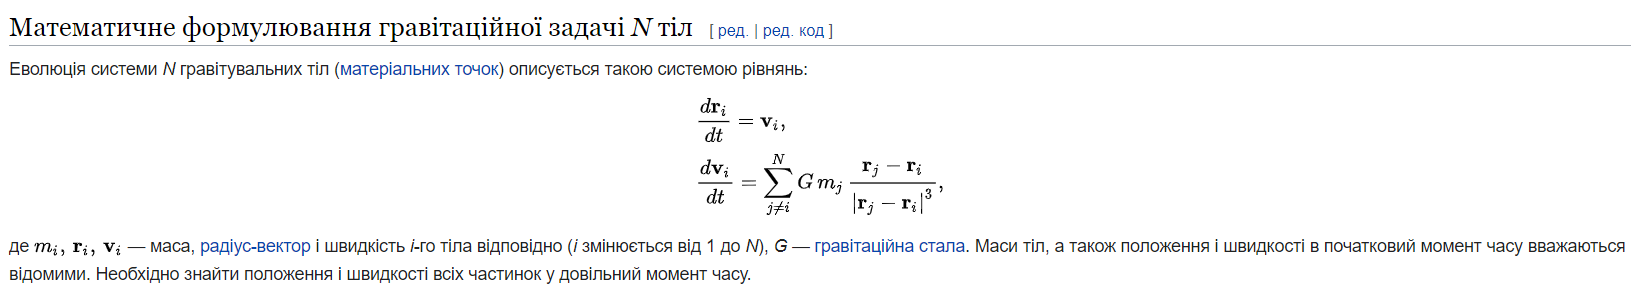

r_i+1 - r_i = dt * v_i

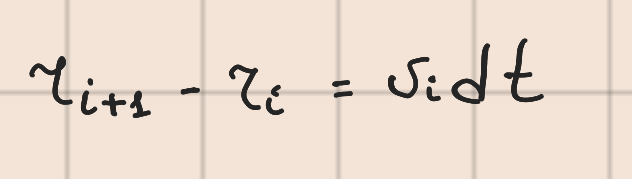

In [17]:
data['r1_2'] = ((data["r1x"] - data["r2x"]) ** 2 + (data["r1y"] - data["r2y"]) ** 2) ** 0.5
data['r1_3'] = ((data["r1x"] - data["r3x"]) ** 2 + (data["r1y"] - data["r3y"]) ** 2) ** 0.5
data['r2_3'] = ((data["r2x"] - data["r3x"]) ** 2 + (data["r2y"] - data["r3y"]) ** 2) ** 0.5

In [18]:
data['accel1x'] = (data['v1x'].diff() / 0.1).fillna(method = 'bfill')
data['accel1y'] = (data['v1y'].diff() / 0.1).fillna(method = 'bfill')
data['accel2x'] = (data['v2x'].diff() / 0.1).fillna(method = 'bfill')
data['accel2y'] = (data['v2y'].diff() / 0.1).fillna(method = 'bfill')
data['accel3x'] = (data['v3x'].diff() / 0.1).fillna(method = 'bfill')
data['accel3y'] = (data['v3y'].diff() / 0.1).fillna(method = 'bfill')

In [19]:
data['testm3_1'] = data['r1_3'] ** 2
data['testm3_2'] = (data["accel1y"]*(data["r1x"] - data["r2x"]) - data["accel1x"]*(data["r1y"] - data["r2y"]))
data['testm3_3'] = ((data["r1x"] - data["r3x"])*(data["r1y"] - data["r2y"]) - (data["r1y"] - data["r3y"])*(data["r1x"] - data["r2x"]))

In [20]:
data['testm2_1'] = data['r2_3'] ** 2 
data['testm2_2'] = (data["accel3y"]*(data["r3x"] - data["r1x"]) - data["accel3x"]*(data["r3y"] - data["r1y"]))
data['testm2_3'] = ((data["r3x"] - data["r2x"])*(data["r3y"] - data["r1y"]) - (data["r3y"] - data["r2y"])*(data["r3x"] - data["r1x"]))

In [21]:
data['testm1_1'] = data['r1_2'] ** 2
data['testm1_2'] = (data["accel2y"]*(data["r2x"] - data["r3x"]) - data["accel2x"]*(data["r2y"] - data["r3y"]))
data['testm1_3'] = ((data["r2x"] - data["r1x"])*(data["r2y"] - data["r3y"]) - (data["r2y"] - data["r1y"])*(data["r2x"] - data["r3x"]))

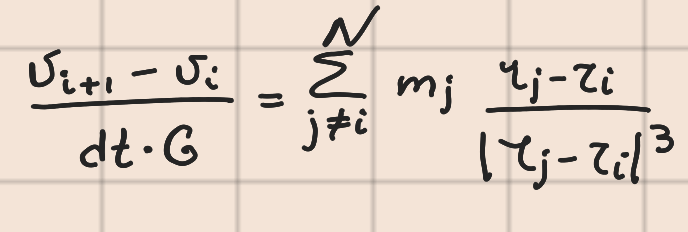

# LinearRegression (3 dot)

In [22]:
from sklearn.linear_model import LinearRegression

lr_3 = LinearRegression()
lr_3.fit((data['testm3_3']).fillna(method = 'bfill').values.reshape(-1, 1), 100*(data['testm3_1'] * data['testm3_2']).fillna(0).values.reshape(-1, 1))

mass_3, err_3 = lr_3.coef_[0][0], lr_3.intercept_[0]
mass_3

0.8788937223819748

# LinearRegression (2 dot)

In [23]:
from sklearn.linear_model import LinearRegression

lr_2 = LinearRegression()
lr_2.fit((data['testm2_3']).fillna(method = 'ffill').values.reshape(-1, 1) / 100, (data['testm2_1'] * data['testm2_2']).fillna(method = 'ffill').values.reshape(-1, 1))

mass_2, err_2 = lr_2.coef_[0][0], lr_2.intercept_[0]
mass_2, err_2

(0.9362317611979617, -2.702713643165655e-10)

# LinearRegression (1 dot)

In [24]:
from sklearn.linear_model import LinearRegression

lr_1 = LinearRegression()
lr_1.fit((data['testm1_3']).fillna(method = 'ffill').values.reshape(-1, 1) / 100, (data['testm1_1'] * data['testm1_2']).fillna(method = 'ffill').values.reshape(-1, 1))

mass_1, err_1 = lr_1.coef_[0][0], lr_1.intercept_[0]
mass_1, err_1

(0.4506119883532954, -5.098416593421473e-10)

# FINAL RESULT: Mass estimation

In [25]:
print(f'Оцінка за допомогою мнк МАСА_1 = {mass_1}, МАСА2 = {mass_2}, МАСА3 = {mass_3}')

Оцінка за допомогою мнк МАСА_1 = 0.4506119883532954, МАСА2 = 0.9362317611979617, МАСА3 = 0.8788937223819748
